# Lab Experiment 06: Linear Regression

## 1. Introduction
In this notebook, we will implement Linear Regression to predict student salaries based on their academic performance. We will cover:
- Data Loading and Cleaning
- Exploratory Data Analysis (EDA)
- Splitting the Data
- Training a Linear Regression Model
- Evaluating the Model

In [ ]:
import pandas as pd

## 2. Importing Libraries and Data
We start by importing the necessary libraries and loading the placement dataset.

In [ ]:
import numpy as np

In [ ]:
pd.read_csv("Placement_Data.csv").head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
df = pd.read_csv("Placement_Data.csv", index_col="sl_no")

In [ ]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## 3. Data Exploration and Cleaning
We will check for missing values, explore categorical and numerical columns, and handle missing data.

In [ ]:
df.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [ ]:
df[["status", "salary"]][df.salary.isnull()]

,status,salary
sl_no,,
4,Not Placed,NaN
6,Not Placed,NaN
7,Not Placed,NaN
10,Not Placed,NaN
13,Not Placed,NaN
...,...,...
199,Not Placed,NaN
202,Not Placed,NaN
207,Not Placed,NaN


In [ ]:
df.status.value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

In [ ]:
df.columns
Cat_col = [
    "gender",
    "ssc_b",
    "hsc_b",
    "hsc_s",
    "degree_t",
    "workex",
    "specialisation",
    "status",
]
num_col = ["ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p", "salary"]
for i in Cat_col:
    print("Coloum_Name = ", i)
    print(df[i].value_counts())

Coloum_Name =  gender
gender
M    139
F     76
Name: count, dtype: int64
Coloum_Name =  ssc_b
ssc_b
Central    116
Others      99
Name: count, dtype: int64
Coloum_Name =  hsc_b
hsc_b
Others     131
Central     84
Name: count, dtype: int64
Coloum_Name =  hsc_s
hsc_s
Commerce    113
Science      91
Arts         11
Name: count, dtype: int64
Coloum_Name =  degree_t
degree_t
Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: count, dtype: int64
Coloum_Name =  workex
workex
No     141
Yes     74
Name: count, dtype: int64
Coloum_Name =  specialisation
specialisation
Mkt&Fin    120
Mkt&HR      95
Name: count, dtype: int64
Coloum_Name =  status
status
Placed        148
Not Placed     67
Name: count, dtype: int64


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df.isnull().sum()

gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [ ]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [ ]:
df.dtypes

gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [ ]:
cat_columns = [
    "gender",
    "ssc_b",
    "hsc_b",
    "hsc_s",
    "degree_t",
    "workex",
    "specialisation",
    "status",
]
for i in cat_columns:
    print("coloumn name ", i, "----", df[i].unique())

coloumn name  gender ---- ['M' 'F']
coloumn name  ssc_b ---- ['Others' 'Central']
coloumn name  hsc_b ---- ['Others' 'Central']
coloumn name  hsc_s ---- ['Commerce' 'Science' 'Arts']
coloumn name  degree_t ---- ['Sci&Tech' 'Comm&Mgmt' 'Others']
coloumn name  workex ---- ['No' 'Yes']
coloumn name  specialisation ---- ['Mkt&HR' 'Mkt&Fin']
coloumn name  status ---- ['Placed' 'Not Placed']


In [ ]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
num_col = ["ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p", "salary"]
df[num_col].corr()

# my independant or x colounms are = [ 'ssc_p',  'hsc_p',  'degree_p','etest_p',  'mba_p']
# my dependent or predictive coloumn is = Salary

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
ssc_p,1.000000,0.511472,0.538404,0.261993,0.388478,0.538090
hsc_p,0.511472,1.000000,0.434206,0.245113,0.354823,0.452569
degree_p,0.538404,0.434206,1.000000,0.224470,0.402364,0.408371
etest_p,0.261993,0.245113,0.224470,1.000000,0.218055,0.186988
mba_p,0.388478,0.354823,0.402364,0.218055,1.000000,0.139823
salary,0.538090,0.452569,0.408371,0.186988,0.139823,1.000000


In [ ]:
df.duplicated().sum()

0

## 4. Data Visualization
Visualizing the relationships between variables, specifically looking at how academic scores relate to placement status.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

sns.set(color_codes=True)

In [ ]:
## Draw scatter plot between 10th and 12th precentage

Text(0.5, 1.0, 'Scatter plot between 10th and 12th precentage')

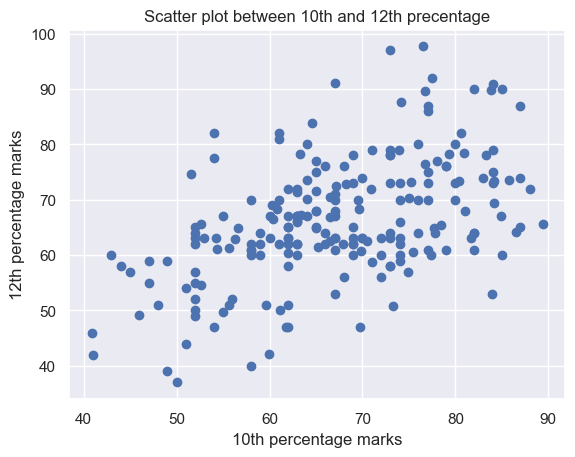

In [ ]:
plt.scatter(df["ssc_p"], df["hsc_p"])
plt.xlabel("10th percentage marks")
plt.ylabel("12th percentage marks")
plt.title("Scatter plot between 10th and 12th precentage")

In [ ]:
colors = {"Placed": "tab:green", "Not Placed": "tab:red"}

In [ ]:
df["status"].map(colors)

sl_no
1      tab:green
2      tab:green
3      tab:green
4        tab:red
5      tab:green
         ...    
211    tab:green
212    tab:green
213    tab:green
214    tab:green
215      tab:red
Name: status, Length: 215, dtype: object

Text(0.5, 1.0, 'Scatter plot between 10th and 12th precentage')

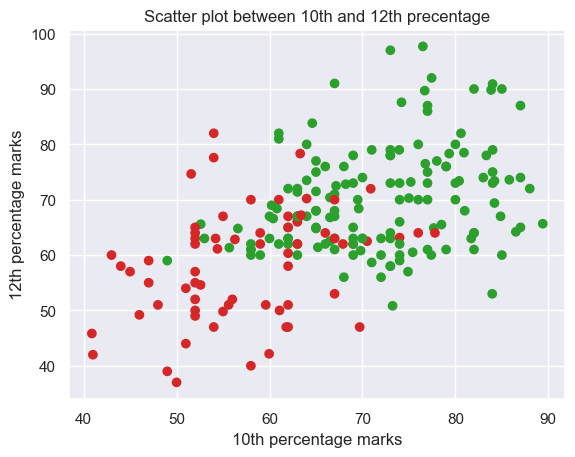

In [ ]:
plt.scatter(df["ssc_p"], df["hsc_p"], c=df["status"].map(colors))
plt.xlabel("10th percentage marks")
plt.ylabel("12th percentage marks")
plt.title("Scatter plot between 10th and 12th precentage")

<Axes: xlabel='ssc_p', ylabel='hsc_p'>

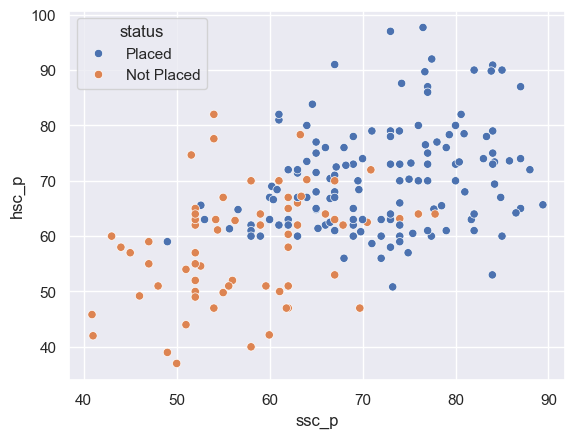

In [ ]:
sns.scatterplot(x="ssc_p", y="hsc_p", data=df, hue="status")

<Axes: xlabel='ssc_p', ylabel='etest_p'>

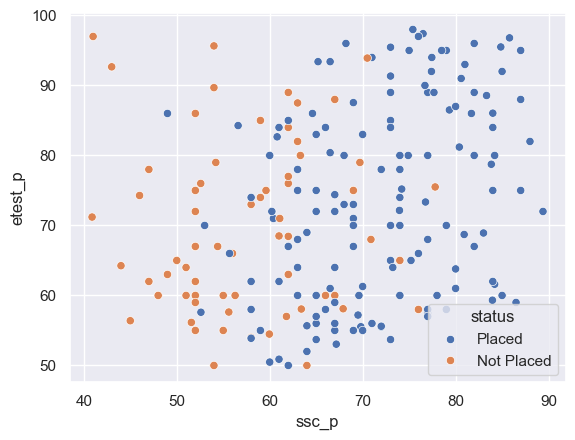

In [ ]:
sns.scatterplot(x="ssc_p", y="etest_p", data=df, hue="status")

insights :- In this scatter plot i am getting the info that student who have greater than 60 percantage in 10th and 12th has succesfully got the job.

## 5. Model Building
We will prepare the data for training, split it into training and testing sets, and train a Linear Regression model.

## Pair plot of continue data type 


In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


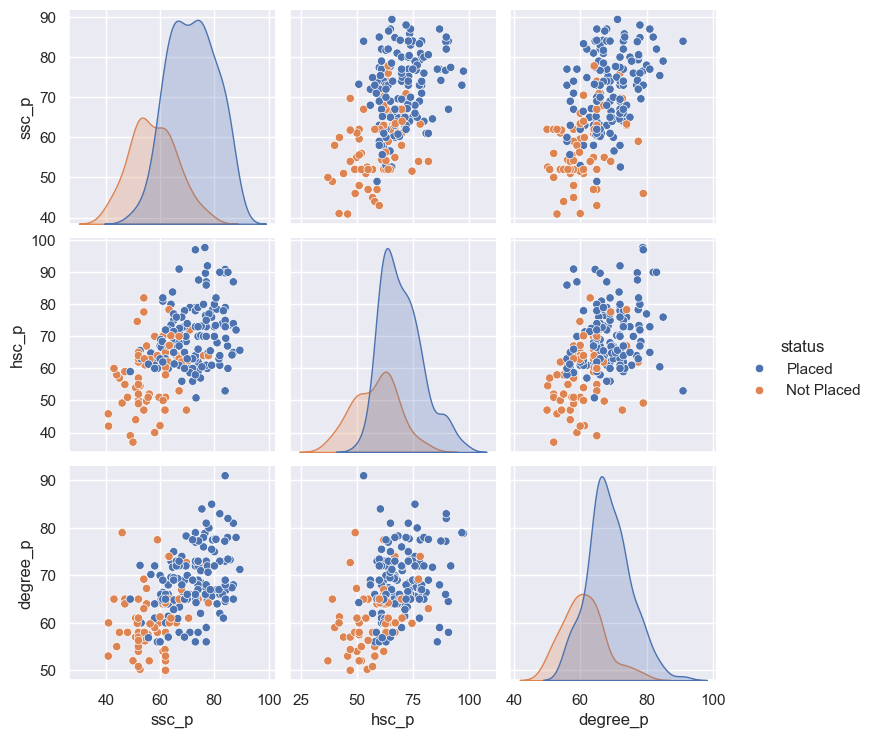

In [ ]:
p_df = df[["ssc_p", "hsc_p", "degree_p", "status"]]
sns.pairplot(p_df, hue="status")

<Axes: xlabel='ssc_p', ylabel='salary'>

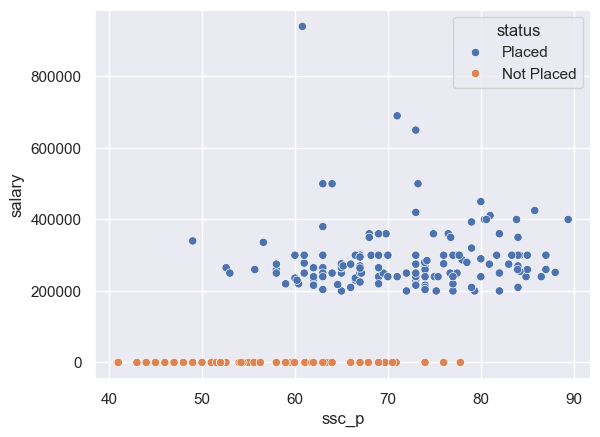

In [ ]:
sns.scatterplot(data=df, x="ssc_p", y="salary", hue="status")

In [ ]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0


#### Draw boxblot to check the values saturations and outliers 
##### Draw a boxblot for 10th & 12th percentage of students 

<Axes: ylabel='salary'>

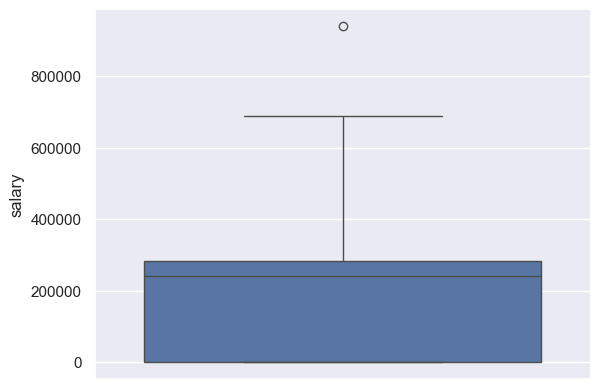

In [ ]:
sns.boxplot(y="salary", data=df)

<Axes: ylabel='hsc_p'>

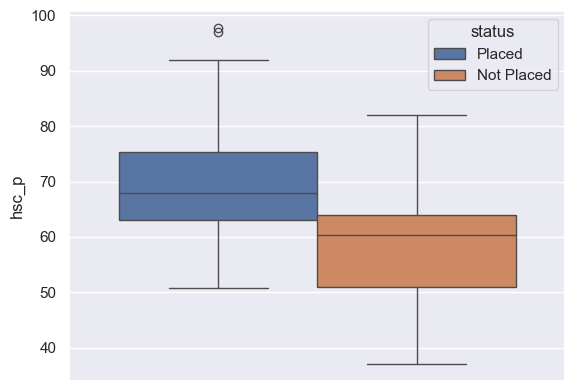

In [ ]:
sns.boxplot(y="hsc_p", hue="status", data=df)

<Axes: ylabel='ssc_p'>

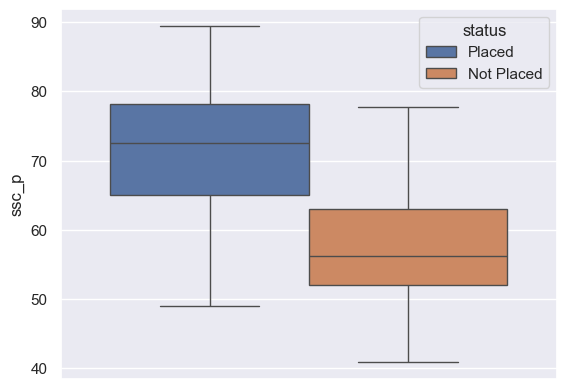

In [ ]:
sns.boxplot(y="ssc_p", data=df, hue="status")

In [ ]:
### Students which has less percentage
## in 10th and 12th are not placed according to this data.

## Some other plots 

Text(0.5, 1.0, '10th & 12th Percentage saturations')

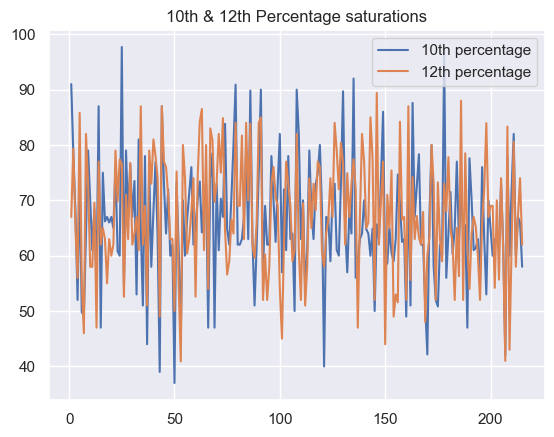

In [ ]:
plt.plot(df["hsc_p"], label="10th percentage")
plt.plot(df["ssc_p"], label="12th percentage")
plt.legend()
plt.title("10th & 12th Percentage saturations")

<Axes: xlabel='specialisation', ylabel='count'>

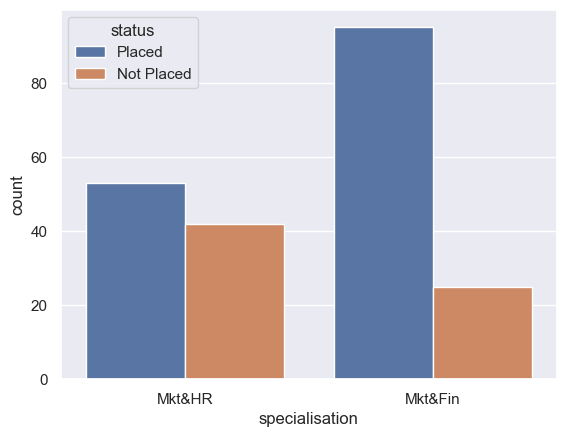

In [ ]:
sns.countplot(x="specialisation", data=df, hue="status")

 So According to above plot Mkt&Finance specialisation students has more placed than HR. 


<Axes: xlabel='mba_p', ylabel='Count'>

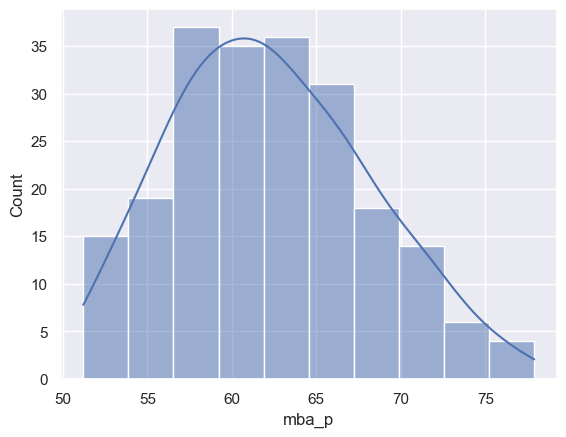

In [ ]:
sns.histplot(x="mba_p", data=df, kde=True)

In [ ]:
num_df = df[["ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p", "salary"]]

<Axes: >

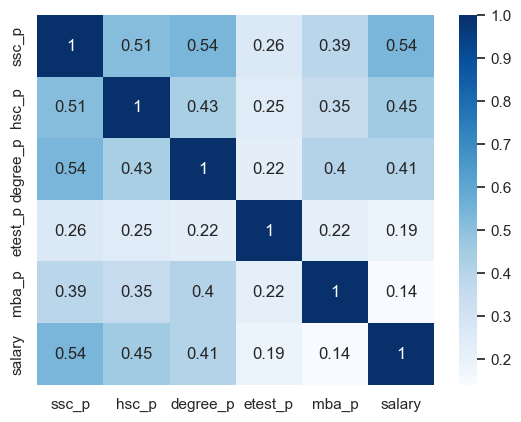

In [ ]:
sns.heatmap(num_df.corr(), annot=True, cmap="Blues")

Insight - As salary is my dependant varriable and ssc_p, hsc_p, degree_p has more impact on it, 
and there is not a single independant varriable is highly 
correlated so we cant drop any function because if we do then data lose may happen.

<Axes: xlabel='salary', ylabel='Count'>

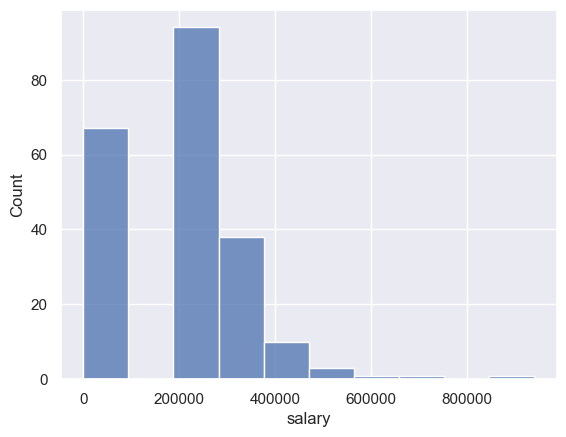

In [ ]:
sns.histplot(df["salary"])

<Axes: xlabel='salary', ylabel='Density'>

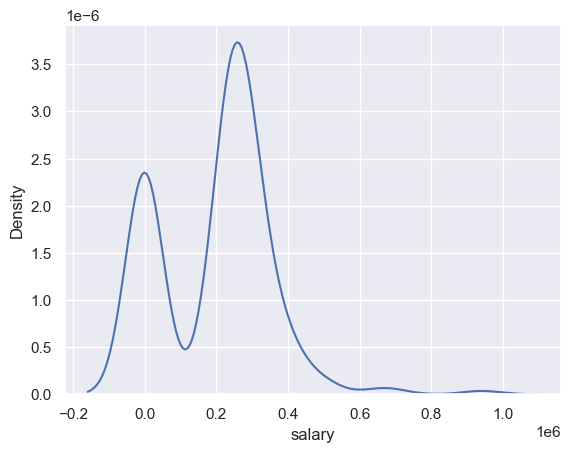

In [ ]:
sns.kdeplot(df["salary"])

## Outlier Analysis

<Axes: ylabel='salary'>

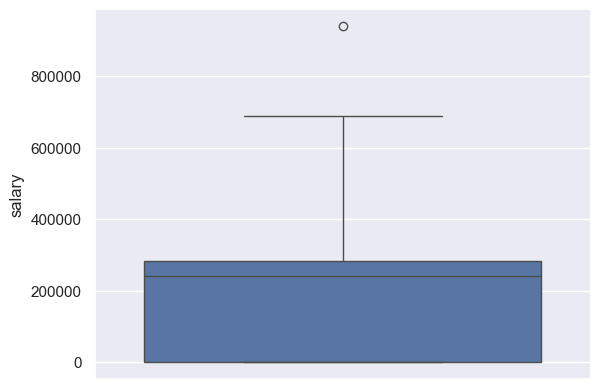

In [ ]:
sns.boxplot(y="salary", data=df)

In [ ]:
percentile25 = df["ssc_p"].quantile(0.25)
percentile25

60.599999999999994

In [ ]:
percentile75 = df["ssc_p"].quantile(0.75)
print(percentile75)
iqr = percentile75 - percentile25
iqr

75.7


15.100000000000009

In [ ]:
uper_limit = percentile75 + (1.5 * iqr)
lower_limit = percentile25 - (1.5 * iqr)
print(uper_limit, lower_limit)

98.35000000000002 37.94999999999998


In [ ]:
df = df[df["degree_p"] < uper_limit]
df = df[df["degree_p"] > lower_limit]

In [ ]:
col = ["ssc_p", "hsc_p", "degree_p", "etest_p", "mba_p", "salary"]

In [ ]:
df.shape

(215, 14)

In [ ]:
for i in col:
    percentile25 = df[i].quantile(0.25)
    percentile75 = df[i].quantile(0.75)
    iqr = percentile75 - percentile25
    uper_limit = percentile75 + (1.5 * iqr)
    lower_limit = percentile25 - (1.5 * iqr)
    print("Uper Limit of ", i, "Coloumn : ", uper_limit)
    print("Lower Limit of ", i, "Coloumn : ", lower_limit)

Uper Limit of  ssc_p Coloumn :  98.35000000000002
Lower Limit of  ssc_p Coloumn :  37.94999999999998
Uper Limit of  hsc_p Coloumn :  91.15
Lower Limit of  hsc_p Coloumn :  42.75
Uper Limit of  degree_p Coloumn :  88.5
Lower Limit of  degree_p Coloumn :  44.5
Uper Limit of  etest_p Coloumn :  118.75
Lower Limit of  etest_p Coloumn :  24.75
Uper Limit of  mba_p Coloumn :  78.71999999999998
Lower Limit of  mba_p Coloumn :  45.480000000000004
Uper Limit of  salary Coloumn :  706250.0
Lower Limit of  salary Coloumn :  -423750.0


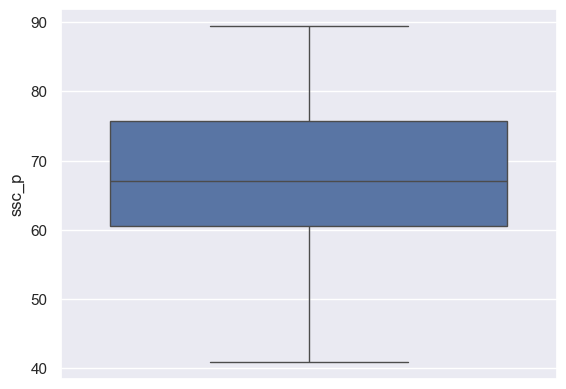

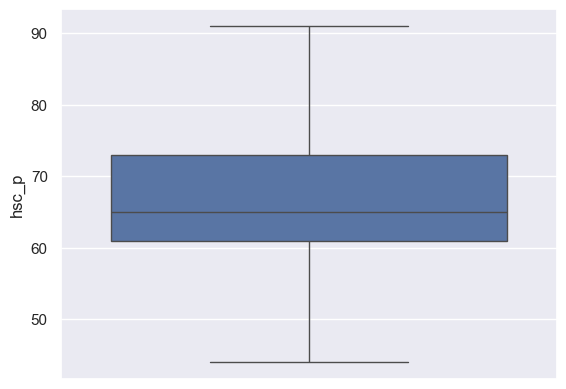

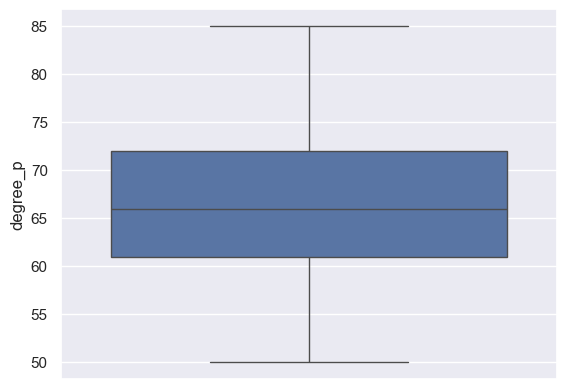

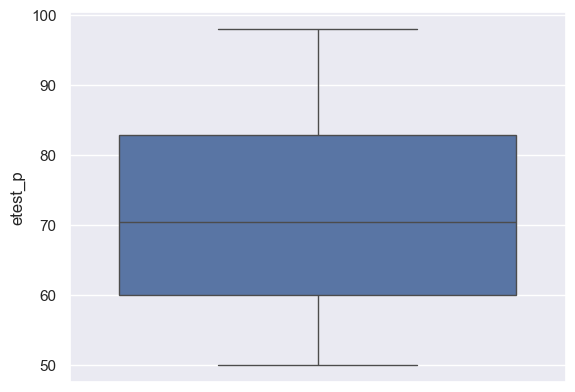

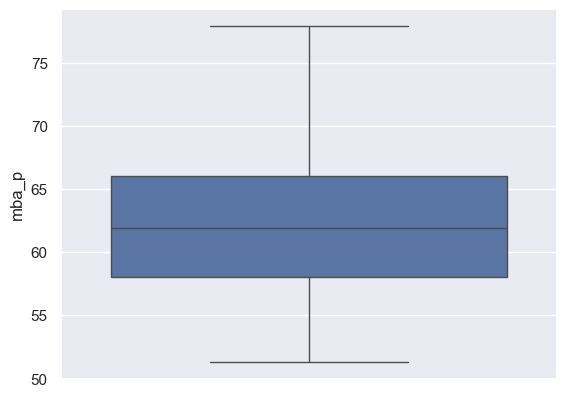

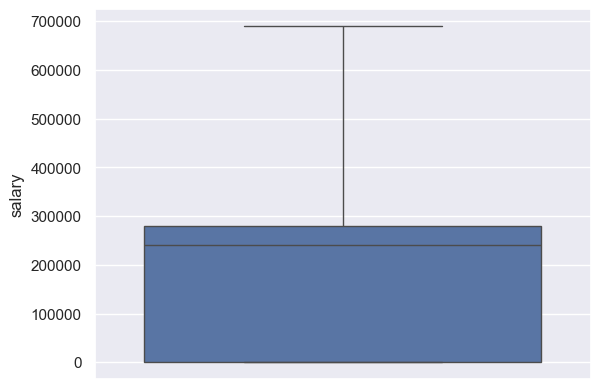

In [ ]:
for c in col:
    percentile25 = df[c].quantile(0.25)
    percentile75 = df[c].quantile(0.75)
    iqr = percentile75 - percentile25
    uper_limit = percentile75 + (1.5 * iqr)
    lower_limit = percentile25 - (1.5 * iqr)
    df = df[df[c] < uper_limit]
    df = df[df[c] > lower_limit]
    plt.figure()
    sns.boxplot(y=c, data=df)

In [ ]:
df.shape

(205, 14)

In [ ]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
sl_no,,,,,,,,,,,,,,
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### Apply One Hot Encoding through pandas getdummies  

In [ ]:
X = df.iloc[:, 0:-2].values
Y = df[["salary"]].values

In [ ]:
df_encode = pd.get_dummies(df, drop_first=False, dtype="int")

In [ ]:
df_encode

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,...,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
sl_no,,,,,,,,,,,,,,,,,,,,,
1,67.00,91.00,58.00,55.0,58.80,270000.0,0,1,0,1,...,0,0,0,1,1,0,0,1,0,1
2,79.33,78.33,77.48,86.5,66.28,200000.0,0,1,1,0,...,1,0,0,1,0,1,1,0,0,1
3,65.00,68.00,64.00,75.0,57.80,250000.0,0,1,1,0,...,0,1,0,0,1,0,1,0,0,1
4,56.00,52.00,52.00,66.0,59.43,0.0,0,1,1,0,...,1,0,0,1,1,0,0,1,1,0
5,85.80,73.60,73.30,96.8,55.50,425000.0,0,1,1,0,...,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,80.60,82.00,77.60,91.0,74.49,400000.0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,1
212,58.00,60.00,72.00,74.0,53.62,275000.0,0,1,0,1,...,1,0,0,1,1,0,1,0,0,1
213,67.00,67.00,73.00,59.0,69.72,295000.0,0,1,0,1,...,0,1,0,0,0,1,1,0,0,1


In [ ]:
print(df_encode.columns)
for i in df[cat_columns].columns:
    print(df[i].unique())

Index(['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary', 'gender_F',
       'gender_M', 'ssc_b_Central', 'ssc_b_Others', 'hsc_b_Central',
       'hsc_b_Others', 'hsc_s_Arts', 'hsc_s_Commerce', 'hsc_s_Science',
       'degree_t_Comm&Mgmt', 'degree_t_Others', 'degree_t_Sci&Tech',
       'workex_No', 'workex_Yes', 'specialisation_Mkt&Fin',
       'specialisation_Mkt&HR', 'status_Not Placed', 'status_Placed'],
      dtype='object')
['M' 'F']
['Others' 'Central']
['Others' 'Central']
['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']
['No' 'Yes']
['Mkt&HR' 'Mkt&Fin']
['Placed' 'Not Placed']


In [ ]:
X = df_encode[
    [
        "ssc_p",
        "hsc_p",
        "degree_p",
        "etest_p",
        "mba_p",
        "gender_F",
        "gender_M",
        "ssc_b_Central",
        "ssc_b_Others",
        "hsc_b_Central",
        "hsc_b_Others",
        "hsc_s_Arts",
        "hsc_s_Commerce",
        "hsc_s_Science",
        "degree_t_Comm&Mgmt",
        "degree_t_Others",
        "degree_t_Sci&Tech",
        "workex_No",
        "workex_Yes",
        "specialisation_Mkt&Fin",
        "specialisation_Mkt&HR",
    ]
].values

In [ ]:
X[0, :]

array([67. , 91. , 58. , 55. , 58.8,  0. ,  1. ,  0. ,  1. ,  0. ,  1. ,
        0. ,  1. ,  0. ,  0. ,  0. ,  1. ,  1. ,  0. ,  0. ,  1. ])

In [ ]:
Y = df_encode.salary.values

In [ ]:
Y[0]

270000.0

In [ ]:
"""
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,2,4,5,7,8,10])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
"""

"\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import OneHotEncoder\nct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,2,4,5,7,8,10])], remainder='passthrough')\nX = np.array(ct.fit_transform(X))\n"

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=45
)

In [ ]:
Y_train.shape

(164,)

In [ ]:
Y_test.shape

(41,)

## Feature Scaling 

In [ ]:
## Feature scaling is used if one column values are more in width then others column and it will dominate in the model /
## just like salary is more in width then hss_b here so we have to bring them in same

## Two types of feature Scaling 

## 1. Normalization and to convert it has formula of  :- -------                                x-xmin / Xmax-Xmin
## 2. Standardization and to convert it has formula of  :-------                    x-mean of column / standard division of column

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

In [ ]:
X_train = mm.fit_transform(X_train)

In [ ]:
X_test = mm.transform(X_test)

In [ ]:
print(pd.DataFrame(X_test).head())

         0         1         2         3         4    5    6    7    8    9   \
0  0.249639  0.380963  0.285714  0.416667  0.071805  0.0  1.0  1.0  0.0  0.0   
1  0.825191  0.724872  0.485714  0.389792  0.364662  0.0  1.0  0.0  1.0  0.0   
2  0.558854  0.225649  0.514286  0.479167  0.630827  0.0  1.0  0.0  1.0  0.0   
3  0.373325  0.358775  0.785714  0.500000  0.590602  1.0  0.0  1.0  0.0  0.0   
4  0.620697  0.735966  0.457143  0.916667  0.235338  0.0  1.0  0.0  1.0  0.0   

   ...   11   12   13   14   15   16   17   18   19   20  
0  ...  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  
1  ...  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  
2  ...  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  
3  ...  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  
4  ...  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  

[5 rows x 21 columns]


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred = reg.predict(X_test)

In [ ]:
pd.concat([pd.DataFrame(Y_pred),pd.DataFrame(Y_test)],axis=1).

,0,0
0,175607.412958,250000.0
1,325985.303791,275000.0
2,169582.646372,350000.0
3,85310.170658,0.0
4,294264.151951,240000.0
5,213120.246453,218000.0
6,215435.789477,0.0
7,190099.943224,220000.0
8,48408.765786,0.0
9,98815.665809,0.0


In [ ]:
Y_test

array([250000., 275000., 350000.,      0., 240000., 218000.,      0.,
       220000.,      0.,      0., 300000., 300000.,      0., 300000.,
            0.,      0., 276000., 250000.,      0., 250000., 360000.,
       300000., 204000., 240000., 250000., 260000., 250000., 300000.,
            0., 265000.,      0., 300000., 270000., 500000., 240000.,
            0.,      0.,      0.,      0., 270000.,      0.])

Text(0.5, 1.0, 'Residules Analysis to find that how model perform')

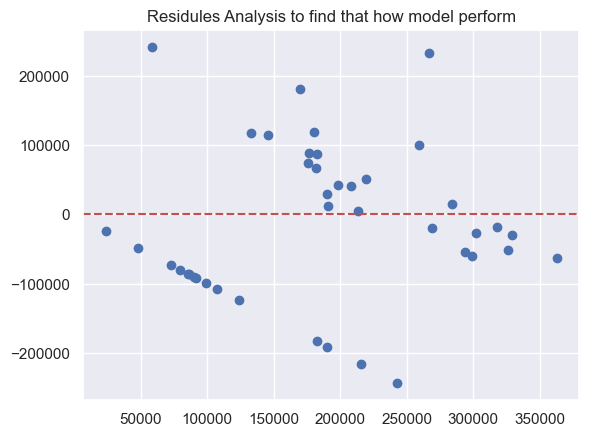

In [ ]:
residuals = Y_test - Y_pred
plt.scatter(Y_pred, residuals)
plt.axhline(y=0, color="r", linestyle="--")
plt.title("Residules Analysis to find that how model perform")

Random Scatter around the horizontal line (y = 0):

Good: Residuals are randomly distributed above and below 0, with no clear pattern.

Bad: A systematic pattern (e.g., curve, funnel shape) suggests model bias or heteroscedasticity.

No Funnel Shape (i.e., residual variance should be constant).

No Clear Trends: Linear, U-shape, or other trends indicate bias.

## Analysis of the Plot:

Residuals seem to show a clear pattern:

High positive and negative residuals appear for mid-range predictions.

The variance of residuals does not seem constant across predicted values.

A slight curve or systematic structure is noticeable, which suggests the model is biased.

The fact that residuals are not randomly scattered indicates the model is not capturing the relationship perfectly.

# Conclusion : model likely suffers from bias, meaning it is underfitting the data.

### Next Steps to Improve:

Try a more complex model (e.g., polynomial regression, random forest, gradient boosting).

Perform feature engineering to capture non-linear effects.

Check for data issues (e.g., outliers, missing variables).

Perform cross-validation to avoid overfitting.

In [ ]:
np.mean(residuals)

-10670.306216565508

In [ ]:
from sklearn import metrics

In [ ]:
metrics.mean_squared_error(Y_test, Y_pred)

12248729346.443575

In [ ]:
import numpy as np

np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))

110673.97772938124

In [ ]:
metrics.r2_score(Y_test, Y_pred)

0.3894949585320928

In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.925788,0.616153,0.665714,0.975000,0.158271,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.435168,0.469714,0.228571,0.562500,0.000000,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.661925,0.713779,0.657143,0.729167,0.546617,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.661925,0.380963,0.457143,0.812500,0.346241,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.303236,0.114710,0.214286,0.158958,0.429699,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.950526,0.425338,0.885714,0.791667,0.807895,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
160,0.738198,0.973375,0.457143,0.833333,0.648872,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
161,0.538240,0.380963,0.628571,0.125000,0.342857,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
162,0.541538,0.591746,0.381429,0.063333,0.534962,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


# Joblib to check my predictions 

In [ ]:
X_train[0, 0:]

array([0.9257885 , 0.61615265, 0.66571429, 0.975     , 0.15827068,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        ])

In [ ]:
Y[1]

200000.0

In [ ]:
import pandas as pd
import joblib

joblib.dump(reg, "linear_regression_model.pkl")
# Load new data
new_data = np.array(
    [
        0.75,
        0.76,
        0.78,
        0.5,
        0.28,
        0.0,
        1.0,
        1.0,
        0.0,
        0.0,
        1.0,
        0.0,
        0.0,
        1.0,
        0.0,
        0.0,
        1.0,
        0.0,
        1.0,
        1.0,
        0.0,
        # Add all your features here
    ]
).reshape(1, -1)
# Load the saved model
model = joblib.load("linear_regression_model.pkl")

# Make predictions
predictions = model.predict(new_data)

# Print the predictions
print(predictions)

print(new_data)

[354253.17445581]
[[0.75 0.76 0.78 0.5  0.28 0.   1.   1.   0.   0.   1.   0.   0.   1.
  0.   0.   1.   0.   1.   1.   0.  ]]


In [ ]:
# Show coefficients and intercept
intercept = model.intercept_
coefficients = model.coef_

print(intercept)
print(coefficients)

-26504.326755304268
[269125.15606768  79656.38062985 126068.32379003 -32147.76006622
 -41208.02986622 -28996.20195435  28996.20195435 -12785.27457942
  12785.27457942   8799.16720597  -8799.16720597  -8438.775774
 -12706.57572146  21145.35149546  21884.06342635  -6506.03796505
 -15378.02546131 -18820.12707652  18820.12707652  15654.40744147
 -15654.40744147]


In [ ]:
features = [f"x{i}" for i in range(len(coefficients))]

equation = f"y = {intercept:.2f} "
for i, coef in enumerate(coefficients):
    sign = "+" if coef >= 0 else "-"
    equation += f"{sign} {abs(coef):.2f}*{features[i]} "

print("Regression Equation:")
print(equation)

Regression Equation:
y = -26504.33 + 269125.16*x0 + 79656.38*x1 + 126068.32*x2 - 32147.76*x3 - 41208.03*x4 - 28996.20*x5 + 28996.20*x6 - 12785.27*x7 + 12785.27*x8 + 8799.17*x9 - 8799.17*x10 - 8438.78*x11 - 12706.58*x12 + 21145.35*x13 + 21884.06*x14 - 6506.04*x15 - 15378.03*x16 - 18820.13*x17 + 18820.13*x18 + 15654.41*x19 - 15654.41*x20 


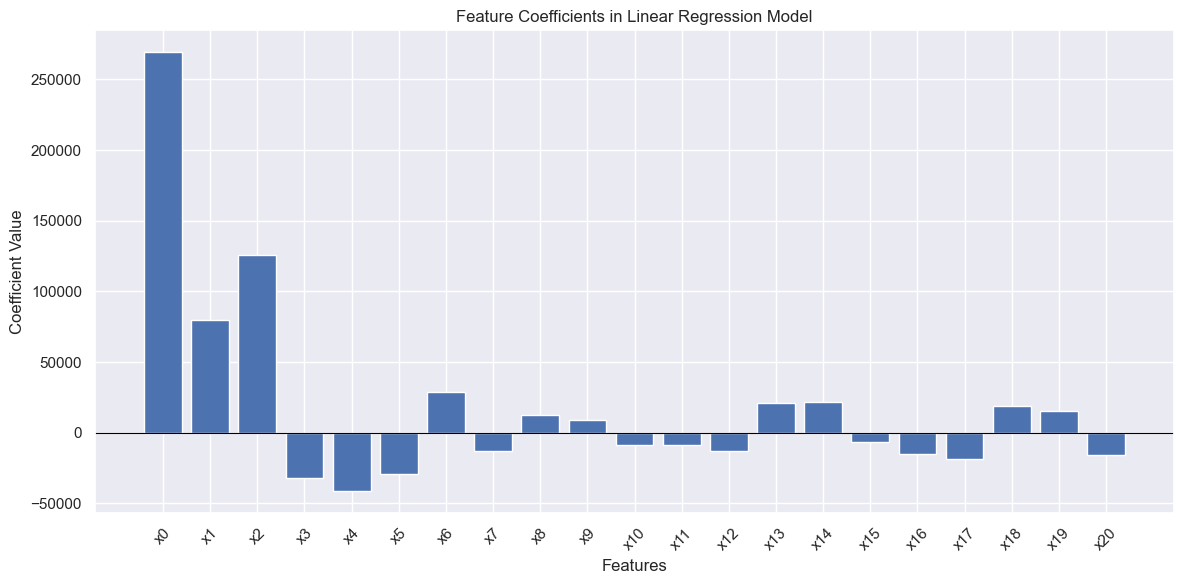

In [ ]:
feature_names = [f"x{i}" for i in range(len(coefficients))]

plt.figure(figsize=(12, 6))
plt.bar(feature_names, coefficients)
plt.axhline(0, color="black", linewidth=0.8)
plt.xticks(rotation=45)
plt.title("Feature Coefficients in Linear Regression Model")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()

Mean Squared Error: 12248729346.443575
R² Score: 0.3894949585320928


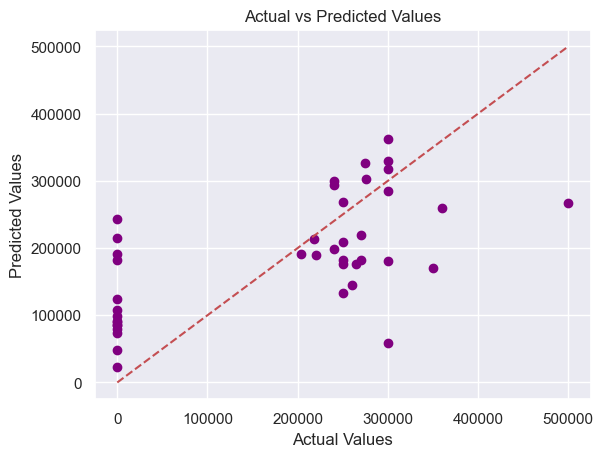

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X)

# Example evaluation
print("Mean Squared Error:", mean_squared_error(Y_test, Y_pred))
print("R² Score:", r2_score(Y_test, Y_pred))

# Optional: Scatter plot of predictions
plt.scatter(Y_test, Y_pred, color="purple")
plt.plot(
    [Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], "r--"
)  # 45-degree line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

In [ ]:
Y_test.shape

(41,)

In [ ]:
Y_pred.shape

(41,)

In [ ]:
X_train.shape

(164, 21)

In [ ]:
pd.concat([pd.Series(Y_test), pd.Series(Y_pred)], axis=1).rename(
    columns={0: "Actual", 1: "Predicted"}
)

,Actual,Predicted
0,250000.0,175607.412958
1,275000.0,325985.303791
2,350000.0,169582.646372
3,0.0,85310.170658
4,240000.0,294264.151951
5,218000.0,213120.246453
6,0.0,215435.789477
7,220000.0,190099.943224
8,0.0,48408.765786
9,0.0,98815.665809
